                                              COMMERCIAL STORE DATA ANALYSIS

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime


In [123]:
#reading the data into notebook

df=pd.read_csv(r"C:\Users\DELL\Desktop\retail sales.csv")
df.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,24/11/2023,CUST001,Male,34,Beauty,3,50,150
1,2,27/02/2023,CUST002,Female,26,Clothing,2,500,1000
2,3,13/01/2023,CUST003,Male,50,Electronics,1,30,30
3,4,21/05/2023,CUST004,Male,37,Clothing,1,500,500
4,5,6/05/2023,CUST005,Male,30,Beauty,2,50,100
5,6,25/04/2023,CUST006,Female,45,Beauty,1,30,30
6,7,13/03/2023,CUST007,Male,46,Clothing,2,25,50
7,8,22/02/2023,CUST008,Male,30,Electronics,4,25,100
8,9,13/12/2023,CUST009,Male,63,Electronics,2,300,600
9,10,7/10/2023,CUST010,Female,52,Clothing,4,50,200


In [124]:
# Display basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [125]:
#descriptive summary
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [126]:
df.shape

(1000, 9)

In [127]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [128]:
# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [129]:
# find duplicates if any
df[df.duplicated()]

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount


In [130]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [131]:
# Creating new features
# Extracting year and month from Date column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.day_name()

In [132]:
# Count of unique customers
unique_customers = df['Customer ID'].nunique()
print("\nUnique Customers:", unique_customers)


Unique Customers: 1000


In [133]:
# Count of transactions per product category
category_counts = df['Product Category'].value_counts()
print("\nTransaction Count per Product Category:")
print(category_counts)


Transaction Count per Product Category:
Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64


In [134]:
# Gender distribution
gender_counts = df['Gender'].value_counts()
print("\nGender Distribution:")
print(gender_counts)


Gender Distribution:
Gender
Female    510
Male      490
Name: count, dtype: int64


In [135]:
# Total Revenue
total_revenue = df['Total Amount'].sum()
print("\nTotal Revenue:", total_revenue)


Total Revenue: 456000


In [136]:
# Average spending per transaction
avg_spending = df['Total Amount'].mean()
print("\nAverage Spending per Transaction:", avg_spending)


Average Spending per Transaction: 456.0


In [137]:
# Revenue generated by product category
revenue_by_category = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
print("\nRevenue by Product Category:")
print(revenue_by_category)


Revenue by Product Category:
Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64


In [148]:
# RFM Analysis (Recency, Frequency, Monetary)
rfm = df.groupby('Customer ID').agg({
    'Date': lambda x: (df['Date'].max() - x.max()).days,
    'Customer ID': 'count',
    'Total Amount': 'sum'
}).rename(columns={'Date': 'Recency', 'Customer ID': 'Frequency', 'Total Amount': 'Monetary'})

# Convert Recency to integer
rfm['Recency'] = rfm['Recency'].astype(int)

# Calculate percentages
rfm_percent = rfm.copy()
rfm_percent['Recency'] = (rfm_percent['Recency'] / rfm_percent['Recency'].max()) * 100
rfm_percent['Frequency'] = (rfm_percent['Frequency'] / rfm_percent['Frequency'].max()) * 100
rfm_percent['Monetary'] = (rfm_percent['Monetary'] / rfm_percent['Monetary'].max()) * 100

# Round percentage values
rfm_percent = rfm_percent.round(2)

# Combine both dataframes for display
rfm_combined = rfm.copy()
rfm_combined[['Recency (%)', 'Frequency (%)', 'Monetary (%)']] = rfm_percent

# Print results
print("\nRFM Analysis (Raw Values & Percentages):")
print(rfm_combined.head())



RFM Analysis (Raw Values & Percentages):
             Recency  Frequency  Monetary  Recency (%)  Frequency (%)  \
Customer ID                                                             
CUST001           38          1       150        10.41          100.0   
CUST002          308          1      1000        84.38          100.0   
CUST003          353          1        30        96.71          100.0   
CUST004          225          1       500        61.64          100.0   
CUST005          240          1       100        65.75          100.0   

             Monetary (%)  
Customer ID                
CUST001               7.5  
CUST002              50.0  
CUST003               1.5  
CUST004              25.0  
CUST005               5.0  


In [150]:
#Identifying Top 20% Customers Who Contribute to 80% Revenue
df_sorted = df.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).reset_index()
df_sorted['Cumulative Revenue'] = df_sorted['Total Amount'].cumsum()
df_sorted['Revenue Percentage'] = df_sorted['Cumulative Revenue'] / df_sorted['Total Amount'].sum()

# Identifying customers contributing to 80% revenue
top_customers_80 = df_sorted[df_sorted['Revenue Percentage'] <= 0.8]
print("\nTop 20% Customers Contributing to 80% Revenue:")
print(top_customers_80)


Top 20% Customers Contributing to 80% Revenue:
    Customer ID  Total Amount  Cumulative Revenue  Revenue Percentage
0       CUST487          2000                2000            0.004386
1       CUST476          2000                4000            0.008772
2       CUST773          2000                6000            0.013158
3       CUST503          2000                8000            0.017544
4       CUST093          2000               10000            0.021930
..          ...           ...                 ...                 ...
296     CUST233           600              362400            0.794737
297     CUST373           600              363000            0.796053
298     CUST136           600              363600            0.797368
299     CUST531           500              364100            0.798465
300     CUST021           500              364600            0.799561

[301 rows x 4 columns]


In [139]:
# Purchase Frequency
purchase_frequency = df.shape[0] / unique_customers
print("\nPurchase Frequency:", purchase_frequency)


Purchase Frequency: 1.0


In [140]:
# Customer Lifetime Value (CLV) Calculation
clv = df.groupby('Customer ID').agg({'Total Amount': ['sum', 'count']})
clv.columns = ['Total Revenue', 'Total Transactions']
clv['CLV'] = clv['Total Revenue'] / clv['Total Transactions']
print("\nCustomer Lifetime Value (CLV):")
print(clv.head())


Customer Lifetime Value (CLV):
             Total Revenue  Total Transactions     CLV
Customer ID                                           
CUST001                150                   1   150.0
CUST002               1000                   1  1000.0
CUST003                 30                   1    30.0
CUST004                500                   1   500.0
CUST005                100                   1   100.0


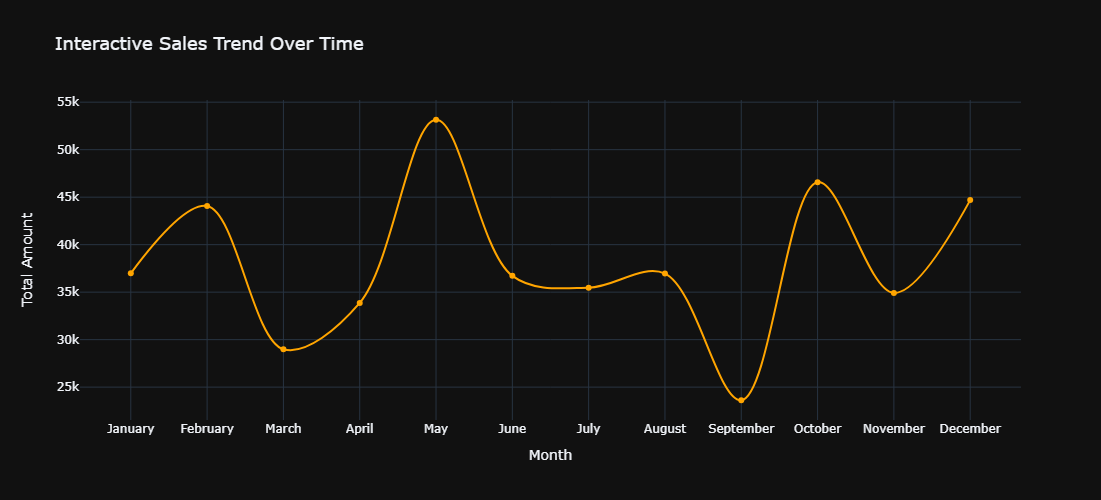

In [145]:
# Convert 'Month' to month names
df['Month'] = df['Date'].dt.strftime('%B')  # Converts month number to full month name

# Aggregate sales by month
time_series = df.groupby('Month', observed=False)['Total Amount'].sum().reset_index()

# Define custom sorting order for months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
time_series['Month'] = pd.Categorical(time_series['Month'], categories=month_order, ordered=True)

# Sort by month order
time_series = time_series.sort_values('Month')

# Create the interactive line chart
fig = px.line(time_series, x='Month', y='Total Amount', title='Interactive Sales Trend Over Time',
              markers=True, line_shape='spline', color_discrete_sequence=['orange'])

# Update layout
fig.update_layout(width=1000, height=500, template='plotly_dark', title_font_size=18)

# Show the figure
fig.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_10712\3814918136.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



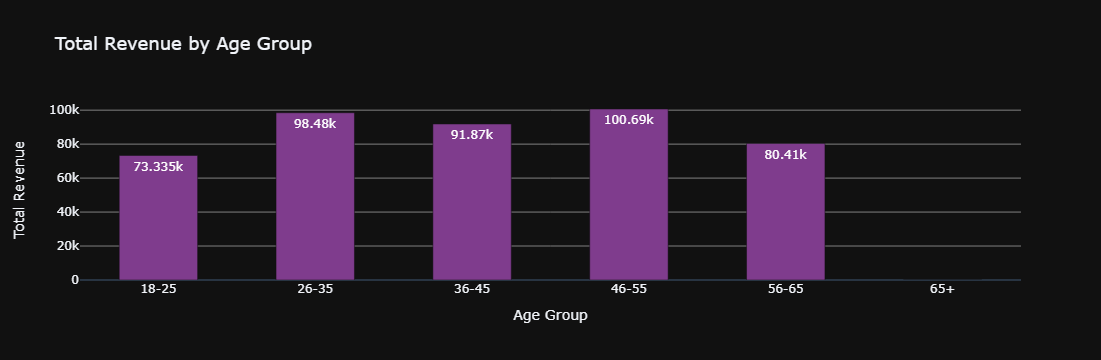

In [90]:
# Categorizing Age Groups
age_bins = [18, 25, 35, 45, 55, 65, 100]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Aggregating Revenue by Age Group
age_revenue = df.groupby('Age Group')['Total Amount'].sum().reset_index()

# Creating Bar Chart with Labels
fig = px.bar(
    age_revenue, 
    x='Age Group', 
    y='Total Amount', 
    title='Total Revenue by Age Group',
    color_discrete_sequence=px.colors.qualitative.Bold,  
    text_auto=True  # Display values on bars
)

# Adjust Layout for Better Readability

fig.update_layout(
    template='plotly_dark',
    title_font_size=18,
    xaxis_title="Age Group",
    yaxis_title="Total Revenue",
    bargap=0.5,
     yaxis=dict(gridcolor="gray")# Adjust bar spacing
)

fig.show()


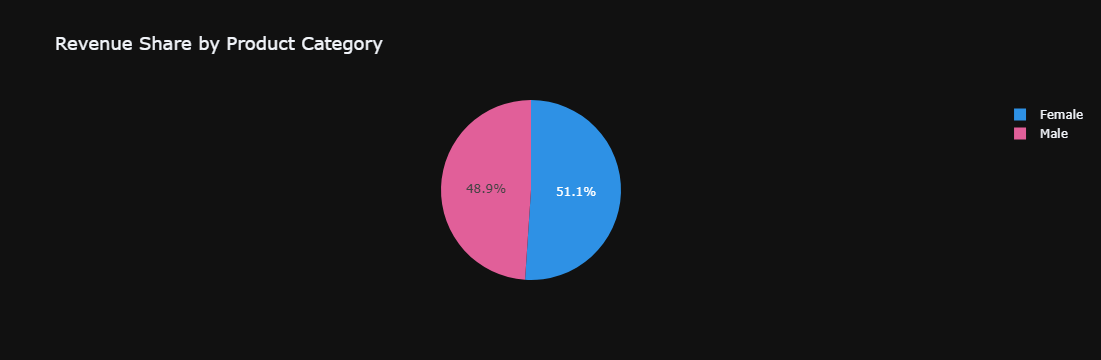

In [83]:
#Revenue Share by gender

category_revenue = df.groupby('Gender', as_index=False)['Price per Unit'].sum()
fig = px.pie(
    category_revenue, 
    names='Gender', 
    values='Price per Unit', 
    title='Revenue Share by Product Category',  
    color_discrete_sequence=px.colors.qualitative.Dark24
)

fig.update_layout(template='plotly_dark', title_font_size=18)
fig.show()


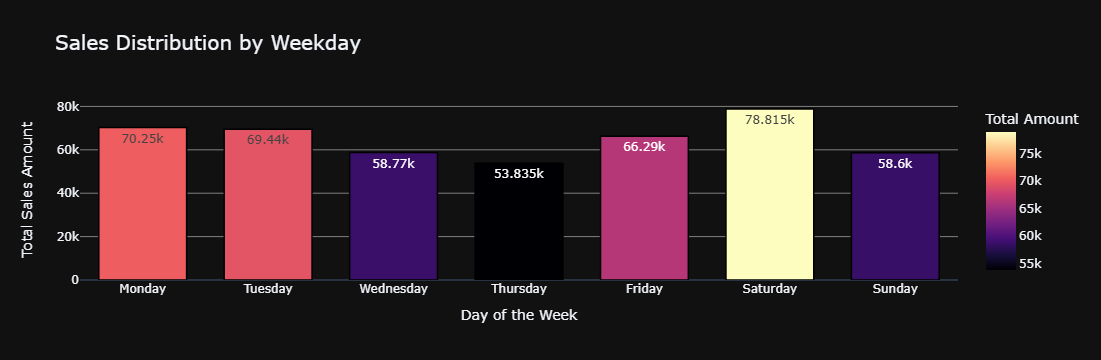

In [78]:
# Ensure 'DayOfWeek' is ordered correctly
weekday_sales = df.groupby('DayOfWeek')['Total Amount'].sum().reset_index()
weekday_sales['DayOfWeek'] = pd.Categorical(weekday_sales['DayOfWeek'], categories=weekday_order, ordered=True)
weekday_sales = weekday_sales.sort_values('DayOfWeek')

# Create the enhanced bar chart
fig = px.bar(
    weekday_sales, 
    x='DayOfWeek', 
    y='Total Amount', 
    title='Sales Distribution by Weekday', 
    color='Total Amount',  # Color based on sales value
    color_continuous_scale='magma',  # More vibrant color scheme
    text_auto=True  # Display values on bars
)

# Improve layout and aesthetics
fig.update_traces(marker=dict(line=dict(width=1.5, color='black')))  # Bar outlines
fig.update_layout(
    template='plotly_dark',
    title_font_size=20,
    xaxis_title="Day of the Week",
    yaxis_title="Total Sales Amount",
    xaxis=dict(showgrid=False),  # Remove grid lines on x-axis
    yaxis=dict(gridcolor="gray"),  # Light gray grid for better readability
    bargap=0.3,  # Adjust bar spacing
)

fig.show()

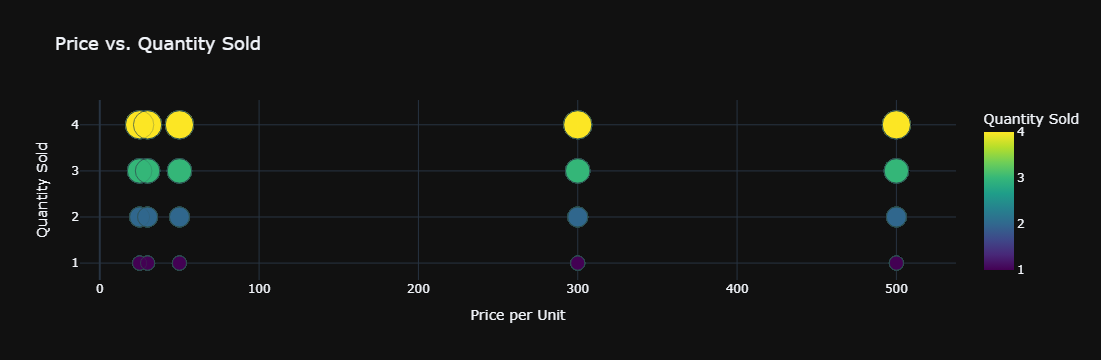

In [92]:
# Price vs. Quantity Sold Correlation
fig = px.scatter(df, x='Price per Unit', y='Quantity', title='Price vs. Quantity Sold',
                 color='Quantity', size='Quantity', opacity=0.7,
                 color_continuous_scale='Viridis',
                 labels={'Unit Price': 'Price per Unit', 'Quantity': 'Quantity Sold'})
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(template='plotly_dark', title_font_size=18)
fig.show()

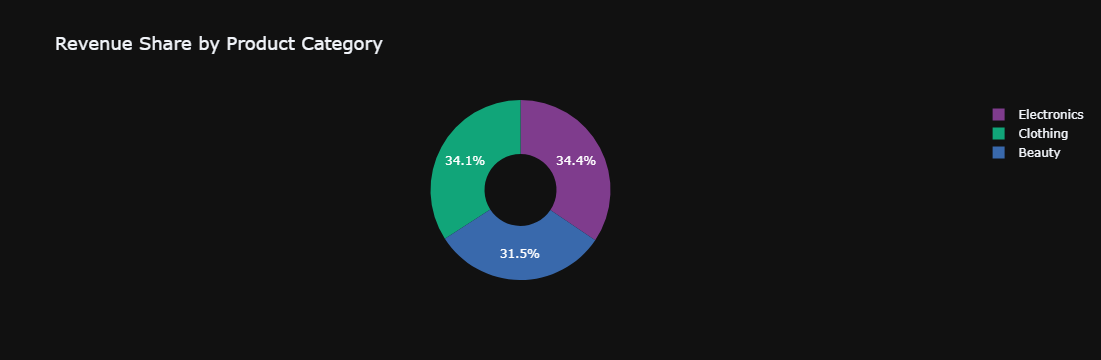

In [37]:
#Revenue Share by Product Category

category_revenue = df.groupby('Product Category', as_index=False)['Total Amount'].sum()
fig = px.pie(
    category_revenue, 
    names='Product Category', 
    values='Total Amount', 
    title='Revenue Share by Product Category',
    hole=0.4,  # Makes it a donut chart
    color_discrete_sequence=px.colors.qualitative.Bold 
)

fig.update_layout(template='plotly_dark', title_font_size=18)
fig.show()


C:\Users\DELL\Desktop\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



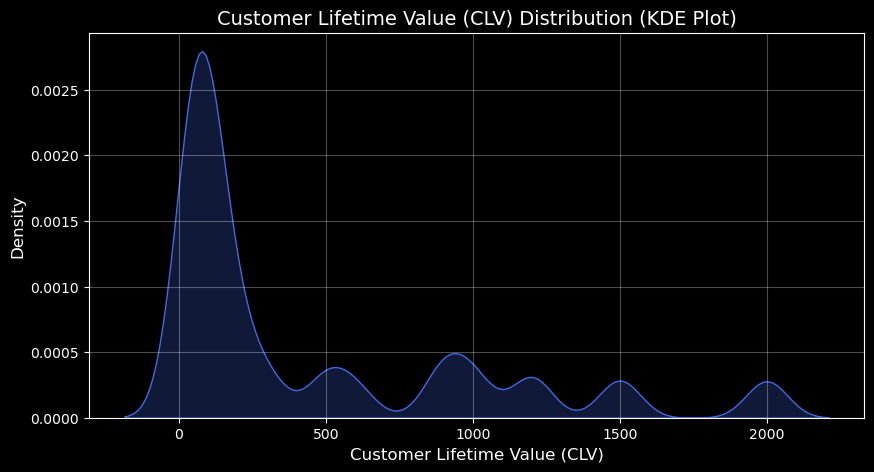

In [38]:
# Set plot style
plt.style.use("dark_background")

# Create KDE plot
plt.figure(figsize=(10, 5))
sns.kdeplot(clv['CLV'], fill=True, color="royalblue", bw_adjust=0.5)

# Labels and title
plt.xlabel("Customer Lifetime Value (CLV)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Customer Lifetime Value (CLV) Distribution (KDE Plot)", fontsize=14)

plt.grid(alpha=0.3)  # Subtle grid for better readability
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_10712\4293834190.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



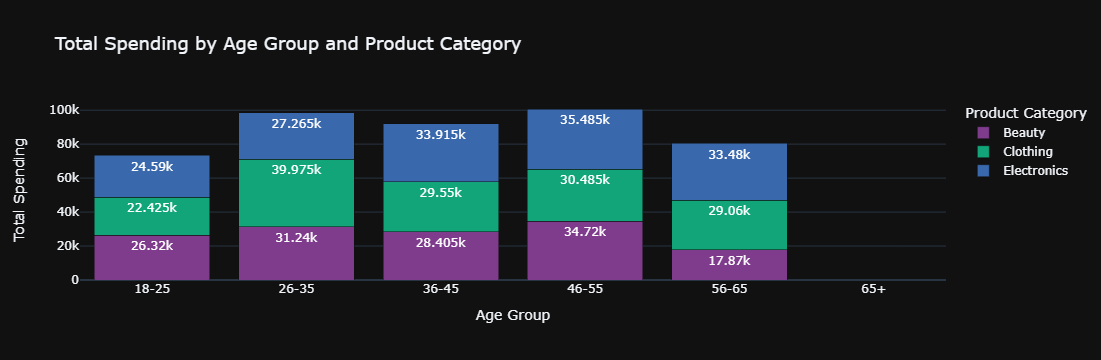

In [91]:
import plotly.express as px

# Aggregating data
age_category_spending = df.groupby(['Age Group', 'Product Category'])['Total Amount'].sum().reset_index()

# Creating Stacked Bar Chart
fig = px.bar(
    age_category_spending, 
    x='Age Group', 
    y='Total Amount', 
    color='Product Category',
    title="Total Spending by Age Group and Product Category",
    text_auto=True,  # Adds labels
    color_discrete_sequence=px.colors.qualitative.Bold
)

fig.update_layout(
    template='plotly_dark',
    title_font_size=18,
    xaxis_title="Age Group",
    yaxis_title="Total Spending",
    barmode='stack',  # Stacked bar for better comparison
    bargap=0.2
)

fig.show()


**Commercial Store Analysis**  insights based on the data exploration, cleaning, and visualization performed.

---

## **1. Dataset Overview & Cleaning**
### **Findings:**
- The dataset contains **1,000 transactions** with **9 columns**.
- **No missing values** were detected, ensuring data completeness.
- The dataset has **unique customer IDs**, indicating that each transaction is linked to a different customer.
- **Data types** were correctly assigned (e.g., numerical values for sales and age, categorical values for gender and product category).

---

## **2. Customer Demographics Analysis**
### **Gender Distribution:**
- **51.1% of transactions** were made by **male customers**.
- **48.9% of transactions** were made by **female customers**.
- The proportion of sales between genders is nearly balanced, with a slight **male dominance**.

- **Unique Customers:1000 unique buyers engaged with the business.**
  
---

## **3. Key Observations from FM Analysis:**

1. **Customer Engagement (Frequency)**
   - All customers in this dataset have only one transaction, which means there is no repeat purchase behavior.
   - This suggests that either the business deals with one-time purchases or lacks a strong customer retention strategy.

2. **Customer Spending Behavior (Monetary)**
   - **High Spenders**: 
     - **CUST002** has contributed **50% of total revenue**, making them the most valuable customer in terms of spending.
     - **CUST004** follows with **25% of total revenue**.
   - **Low Spenders**:
     - **CUST003** has the lowest contribution (**1.5%**), meaning they spent significantly less than others.
     - **CUST001** and **CUST005** also contributed relatively lower amounts (**7.5%** and **5%**, respectively).

3. **Recency Analysis**
   - **Most Recent Customers**: 
     - **CUST001** made their purchase **38 days ago**, meaning they are the most recently engaged customer.
   - **Least Recent Customers**: 
     - **CUST003** made their last purchase **353 days ago**, making them the least engaged.

4. **Customer Segmentation Insights**
   - **High-Value & Engaged Customers (CUST002, CUST004)**: They contributed the most revenue, but their recency is relatively high (308 and 225 days ago). They should be re-engaged with targeted offers.
   - **Potential Churn (CUST003)**: A very old last purchase (353 days ago) and low spending indicate a high chance of churn. A reactivation strategy could be implemented.
   - **Newly Engaged but Low Spenders (CUST001, CUST005)**: These customers are recent but haven't spent much. Offering incentives for repeat purchases may increase their engagement.

### **Possible Business Strategies:**
- **Customer Retention:** Since all customers have only one transaction, loyalty programs, discounts, or email campaigns could
-  encourage repeat purchases.
- **High-Value Customer Retargeting:** Since CUST002 and CUST004 are responsible for 75% of revenue, personalized engagement strategies
-  should be designed for them.
- **Win-Back Campaigns:** CUST003 and CUST004 haven’t made purchases in a long time—sending personalized reminders or special
-  deals might help regain them.
- **Increase Low-Spender Engagement:** CUST001 and CUST005, despite being recent, haven’t spent much. Bundling offers or discounts on their next purchase.

---

## **4. Age Distribution:**
- The **average customer age** is  approx **41 years**.
- The majority of customers fall into the **46-55 age group (100.69k)**, followed by:
  - **18-25 years (73.335k)**.
  - **26-35 years (98.4k)**.
  - **36-45 years (91.87k)**
  - **56-65 years (81.41k)**.
- **Younger customers (26-35)** and **(46-55)** contribute the most sales, making them the primary target audience.

---

## **5. Sales Performance by Product Category**
### **Revenue Contribution by Category:**
- **Electronics** has the highest number of transactions (**34.4%** of total sales).
- **Clothing** contribute **34.1**.
- **Beauty** makes up **31.5%**.

---

## **6. Sales Trend Analysis**
### **Peak Sales Periods:**
- The **highest sales occur during weekends (Saturday-78.815k)**.
- The **lowest sales are recorded on Thursday-53.835**, indicating a drop in shopping activity.


## **7. (CLV) Distribution**
**Right-Skewed Distribution:**

- **Most customers have a low CLV**, as indicated by the **sharp peak** near the left.
- **A few customers have exceptionally high CLV**, forming the **long tail** on the right.

---

### **Multiple Small Peaks:**

- The small bumps in the KDE suggest **distinct groups of customers with different spending behaviors**.
- This could indicate customer segments, **such as low, mid, and high-value customers.**

---

 **Outliers Present:**
- **The long tail on the right suggests a few high-value customers who contribute significantly to revenue.**

---

## **Average Sending per Transaction: 456.0**
---
## THANKYOU